<a href="https://colab.research.google.com/github/SaishWarule1116/Natural-Language-Processing-NLP-/blob/main/Word2Vec_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
pip install gensim nltk numpy matplotlib scikit-learn


In [124]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
corpus = [
    "Alzheimer disease affects memory and cognitive function in elderly patients.",
    "Wearable devices like Fitbit track heart rate and sleep patterns.",
    "Cognitive decline can be slowed with regular exercise and healthy diet.",
    "Heart rate variability indicates stress and cognitive health.",
    "Sleep quality impacts memory consolidation and brain function.",
    "Samsung watches monitor activity and stress for better health.",
    "Early detection of Alzheimer symptoms improves treatment outcomes.",
    "Physical activity boosts cognitive reserve and reduces dementia risk."
]

**Preprocessing on Text Data**

In [87]:
# Convert to lowercase
corpus = [sentence.lower() for sentence in corpus]

In [88]:
# Remove punctuation more effectively
punct = string.punctuation
corpus = [sentence.translate(str.maketrans(punct, ' ' * len(punct))) for sentence in corpus]

In [89]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
# Tokenization and stop word removal (assuming stop_word is already defined)
from nltk.corpus import stopwords
stop_word = set(stopwords.words('english'))
corpus_tokens = []

for sentence in corpus:
    tokens = word_tokenize(sentence)
    filtered_tokens = [token for token in tokens if token not in stop_word]
    corpus_tokens.append(filtered_tokens)

**Tarin Model on Word2Vec**

In [93]:
model = Word2Vec(sentences = corpus_tokens, vector_size = 100, window=5, min_count=1) # Use corpus_tokens instead of corpus
model.save("health_word2vec.model")
print("Model trained!")

Model trained!


**Find similar words**

In [107]:
similar_words =model.wv.most_similar('alzheimer',topn =2)
print("alzheimer : ",similar_words)
sililar_wordss = model.wv.most_similar('heart',topn =2)
print("heart : ",sililar_wordss)

alzheimer :  [('affects', 0.18892841041088104), ('dementia', 0.18889103829860687)]
heart :  [('samsung', 0.21206176280975342), ('rate', 0.1991206258535385)]


**Check raw vectors to understand embeddings.**

In [111]:
# Get vector for "Alzheimer"
alzheimer_vector = model.wv["alzheimer"]
print("Alzheimer vector shape:", alzheimer_vector.shape)
print("First 5 dimensions:", alzheimer_vector[:5])

Alzheimer vector shape: (100,)
First 5 dimensions: [-0.00861952  0.00366565  0.00518561  0.00574211  0.0074692 ]


In [120]:
# Get all unique words
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]
words_vectors = dict(zip(words, vectors))
print("Number of unique words:", len(words_vectors))
print(words_vectors['cognitive'])

Number of unique words: 48
[-5.3490128e-04  2.3560463e-04  5.1034144e-03  9.0057217e-03
 -9.3036760e-03 -7.1161361e-03  6.4588413e-03  8.9731999e-03
 -5.0150803e-03 -3.7618461e-03  7.3832311e-03 -1.5314340e-03
 -4.5381389e-03  6.5521998e-03 -4.8620007e-03 -1.8180610e-03
  2.8784783e-03  9.9027611e-04 -8.2879076e-03 -9.4505912e-03
  7.3102657e-03  5.0675687e-03  6.7611965e-03  7.5900939e-04
  6.3475221e-03 -3.4082632e-03 -9.4442174e-04  5.7668975e-03
 -7.5228214e-03 -3.9353133e-03 -7.5101312e-03 -9.3212008e-04
  9.5409900e-03 -7.3169023e-03 -2.3343358e-03 -1.9398736e-03
  8.0749365e-03 -5.9297658e-03  4.6928872e-05 -4.7572237e-03
 -9.6062990e-03  5.0084111e-03 -8.7571908e-03 -4.3893070e-03
 -3.4492026e-05 -2.9578526e-04 -7.6609198e-03  9.6147675e-03
  4.9822293e-03  9.2356708e-03 -8.1611220e-03  4.4968412e-03
 -4.1348729e-03  8.2265388e-04  8.4975995e-03 -4.4649686e-03
  4.5185057e-03 -6.7844703e-03 -3.5483055e-03  9.3989968e-03
 -1.5752509e-03  3.2159852e-04 -4.1413754e-03 -7.6846909e-

In [122]:
# Reduce Dimention to 2D using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

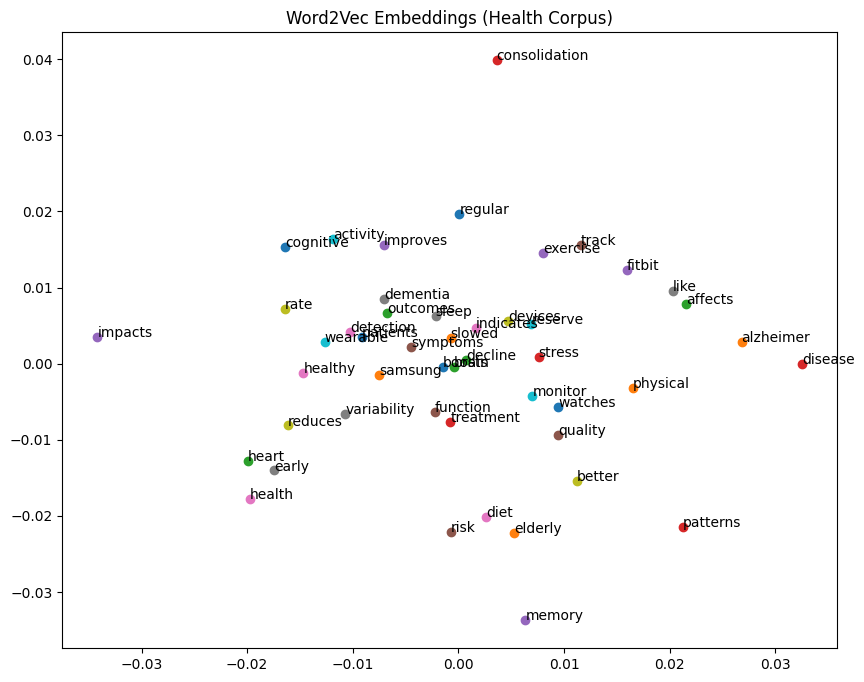

In [123]:
# Plot
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.title("Word2Vec Embeddings (Health Corpus)")
plt.show()